<a href="https://colab.research.google.com/github/ParalelaUnsaac/2020-2/blob/main/182906_Gu%C3%ADa_2_Txonomia_Flynn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El siguiente código va a permitir que todo código ejecutado en el colab pueda ser medido

In [ ]:
!pip install ipython-autotime
!pip install numpy
!pip install Pyro4

%load_ext autotime

     |████████████████████████████████| 92kB 3.2MB/s 
time: 1.54 ms


In [ ]:
print(sum(range(10)))

45
time: 830 µs


Pregunta #1: Que porción de 1 segundo es el valor impreso?

In [ ]:
time = 465 ms
La porción de segundo impreso son los milisegundos.

Que es 10^(-6) en notación *científica*


---



A seguir, tenemos una librería de Python llamado **numba** que realiza paralelización automatica. Asi, se puede verificar que al usar prange() se tiene mejor tiempo de ejecución que al usar range()

In [ ]:
#Input
#Procedimiento
#Output

#%load_ext autotime

from numba import njit, prange
import numpy as np

A = np.arange(5, 10) #14000000
@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in prange(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))

35
time: 390 ms


In [ ]:
from numba import njit, prange

A = np.arange(5, 10)
#@njit(parallel=True)
def prange_test(A):
    s = 0
    # Without "parallel=True" in the jit-decorator
    # the prange statement is equivalent to range
    for i in range(A.shape[0]):
        s += A[i]
    return s

print(prange_test(A))



35
time: 3.37 ms


Pregunta #2: identifique otros valores en A, de manera que, serializando, tengamos mejor resultado que paralelizando

> np.arange(5 - 10)

          Paralelizando: 390 ms 
          Sin paralelización: 3.37 ms

---

> np.arange(5 - 200)

          Paralelizando: 439 ms  
          Sin paralelización: 7.42 ms

---

> np.arange(5 - 14000000)

          Paralelizando: 388  ms 
          Sin paralelización: 3.3 s

---


**Se puede observar que si ejecutamos con  paralelización, sea cualquiera el rango, el tiempo no va a diferir mucho en todos los casos.**

**A diferencia de lo que ocurre cuando ejecutamos sin paralelización, se puede observar un cambio grande en los tiempos de ejecución cuando le damos rangos diferentes.**



La Taxonomia de Flynn define 4 tipos de arquitecturas para computación paralela: SISD, SIMD, MISD, y MIMD. 


---


Pregunta #3 : El ultimo código ejecutado es de tipo?

SSID de manera secuencial



---



Pregunta #4: el siguiente código paralelo es de tipo? Comentar el código para justificar su respuesta

- Los dos hilos ejecutan la misma instrucción (en este caso print_time)

- Cada hilo procesa datos distintos

- Su ejecución es simultánea

Por lo tanto es de tipo SIMD.

In [ ]:
import threading
import time


def print_time(name, n): 
    count = 0   
    print("Para el Hilo: %s, en el momento: %s, su valor de count es: %s" % ( name, time.ctime(), count))
    while count < 5:
        time.sleep(n) #bloque de hilo 0 segundos, entoces se tiene una ejecución del hilo sin interrupciones
        count += 1
        print("%s: %s. count %s" % ( name, time.ctime(), count))

#Creación de dos hilos que ejecutan la función print_time        
t1 = threading.Thread(target=print_time, args=("Thread-1", 0, ) )
t2 = threading.Thread(target=print_time, args=("Thread-2", 0, ) )

#Inicialización de los hilos
t1.start()
t2.start()

Para el Hilo: Thread-1, en el momento: Wed Dec  9 15:31:22 2020, su valor de count es: 0
Thread-1: Wed Dec  9 15:31:22 2020. count 1
Thread-1: Wed Dec  9 15:31:22 2020. count 2
Thread-1: Wed Dec  9 15:31:22 2020. count 3
Thread-1: Wed Dec  9 15:31:22 2020. count 4
Thread-1: Wed Dec  9 15:31:22 2020. count 5
Para el Hilo: Thread-2, en el momento: Wed Dec  9 15:31:22 2020, su valor de count es: 0time: 12.4 ms

Thread-2: Wed Dec  9 15:31:22 2020. count 1
Thread-2: Wed Dec  9 15:31:22 2020. count 2
Thread-2: Wed Dec  9 15:31:22 2020. count 3
Thread-2: Wed Dec  9 15:31:22 2020. count 4
Thread-2: Wed Dec  9 15:31:22 2020. count 5




---



Una computadora paralela tipo MIMD es utilizado más en la computación distribuida, ejm. Clusters. El siguiente código en python desktop muestra tal funcionamiento

In [ ]:
#greeting-server.py
import Pyro4

@Pyro4.expose #Métodos, clases y propiedades disponibles de forma remota
class GreetingMaker(object):
    def get_fortune(self, name):
        return "Hello, {0}. Here is your fortune message:\n" \
               "Behold the warranty -- the bold print giveth and the fine print taketh away.".format(name)

daemon = Pyro4.Daemon()                # make a Pyro daemon
uri = daemon.register(GreetingMaker)   # register the greeting maker as a Pyro object

print("Ready. Object uri =", uri)      # print the uri so we can use it in the client later
daemon.requestLoop()                   # start the event loop of the server to wait for calls

In [ ]:
#greeting-client.py
import Pyro4

uri = input("What is the Pyro uri of the greeting object? ").strip()
name = input("What is your name? ").strip()

greeting_maker = Pyro4.Proxy(uri)         # get a Pyro proxy to the greeting object
print(greeting_maker.get_fortune(name))   # call method normally

Pregunta #5: Explique que hace este código de tipo MIMD

En el primer código que es nuestro servidor, se crea un servicio de saludo que tiene como parámetro un nombre.

daemon es nuestro objeto daemon, lo creamos y luego registramos el objeto con deamon para convertilo en un objeto Pyro, después ingresamos el ciclo de solicitud de nuestro daemon.

El segundo código es el código del cliente que solicita el uri. Y si el uri es correcto Pyro va a crear una instacia de la clase y va a usar ese único objeto para manejar las llamadas a ese método.

Y así otro cliente puede estar accediendo en ese mismo instante al servidor.



---



Ejercicio Propuesto: Crear un ejemplo que muestre una computación paralela de tipo MISD

In [ ]:
import threading
import time

count = 0 #Variable global

def print_Hello():
    global count #indicar que se va a usar la variable global
    while count < 5:
        time.sleep(2) #bloque de hilo 2 segundos
        print("count = %s -> Hello -> %s\n" % (count, time.ctime(), ))
        count += 1

def print_Hi():
    global count #indicar que se va a usar la variable global
    while count < 5:
        time.sleep(2) #bloque de hilo 2 segundos
        print("count = %s -> Hi -> %s\n" % (count, time.ctime(), ))
        count += 1
        

#Creación de dos hilos que ejecutan diferentes instrucciones
t1 = threading.Thread(target = print_Hello)
t2 = threading.Thread(target = print_Hi)

#Inicialización de los hilos
t1.start()
t2.start()

Este ejemplo muestra una computación paralela de tipo MISD por los siguientes puntos:


*   Cada hilo ejecuta una instrucción distinta

        El hilo 1 ejecuta la función print_Hello() y el hilo 2 ejecuta la función print_Hi()

*   Cada hilo procesa el mismo dato

        En este caso comparten una variable global que es count

*   Paralelismo a nivel de datos
          La variable global se distribuye en 2 procesos distintos que se ejecutan paralelamente.

Ejecución en IDLE Python 3.7

En esta ejecución se puede observar que el valor de ***count*** es compartido entre los dos hilos y cada 2 segundos el valor de ***count*** se incrementa en 2.

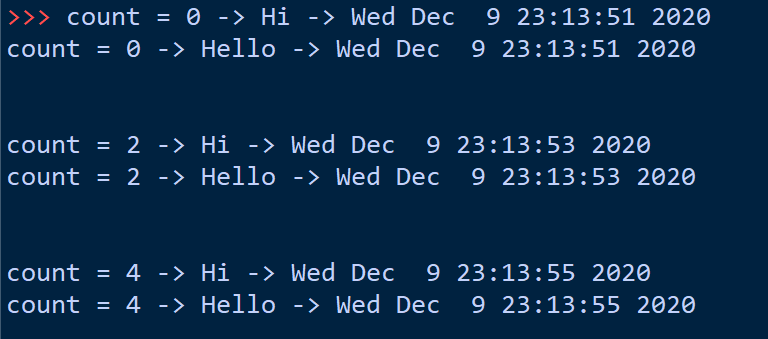

**Referencias**

https://wiki.python.org/moin/ParallelProcessing

https://numba.readthedocs.io/en/stable/user/parallel.html

https://ao.gl/how-to-measure-execution-time-in-google-colab/

http://noisymime.org/blogimages/SIMD.pdf